In [1]:
from quantum_dataset import QM7, QM7b, QM9, Champs, SuperSet
from quantum_learning import Learn, Selector, ChampSelector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

RDKit WARNING: [21:40:30] Enabling RDKit 2019.09.3 jupyter extensions


<class 'quantum_dataset.QM7'> dataset created...
epoch: 0 of 200, train loss: 2036978.2838541667, val loss: 2015669.1770833333
epoch: 1 of 200, train loss: 1988982.8177083333, val loss: 1943201.2356770833
epoch: 2 of 200, train loss: 1927734.1197916667, val loss: 1858085.732421875
epoch: 3 of 200, train loss: 1768152.8860677083, val loss: 1671066.6197916667
epoch: 4 of 200, train loss: 1666283.5625, val loss: 1540289.1328125
epoch: 5 of 200, train loss: 1446799.396484375, val loss: 1307319.888671875
epoch: 6 of 200, train loss: 1200811.294921875, val loss: 1054263.1979166667
epoch: 7 of 200, train loss: 1001304.9348958334, val loss: 862263.2493489584
epoch: 8 of 200, train loss: 791206.6822916666, val loss: 679329.7102864584
epoch: 9 of 200, train loss: 640511.6852213541, val loss: 570077.8541666666
epoch: 10 of 200, train loss: 529678.9565429688, val loss: 505068.9244791667
epoch: 11 of 200, train loss: 531272.7610677084, val loss: 521740.6168619792
epoch: 12 of 200, train loss: 51137

epoch: 107 of 200, train loss: 21589.192952473957, val loss: 16644.421061197918
epoch: 108 of 200, train loss: 21392.740559895832, val loss: 19056.039713541668
epoch: 109 of 200, train loss: 20259.9501953125, val loss: 18927.6171875
epoch: 110 of 200, train loss: 19590.992268880207, val loss: 14548.252888997396
epoch: 111 of 200, train loss: 19367.837565104168, val loss: 19397.18603515625
epoch: 112 of 200, train loss: 17869.145060221355, val loss: 14557.150655110678
epoch: 113 of 200, train loss: 14632.775919596354, val loss: 18175.081013997395
epoch: 114 of 200, train loss: 16219.400553385416, val loss: 15130.11631266276
epoch: 115 of 200, train loss: 15475.608235677084, val loss: 15190.382405598959
epoch: 116 of 200, train loss: 11349.293111165365, val loss: 13761.853190104166
epoch: 117 of 200, train loss: 12728.799565633139, val loss: 15466.652506510416
epoch: 118 of 200, train loss: 13292.292856852213, val loss: 13080.306111653646
epoch: 119 of 200, train loss: 12488.3056640625, 

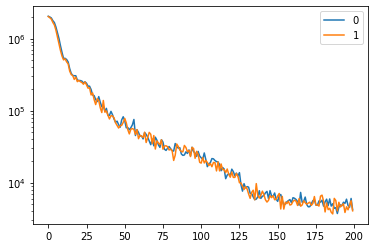

learning time: 0:01:54.089864


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss, 
      batch_size=128, epochs=200, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 'H': 4096, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, 
      Optimizer=Adam, Criterion=MSELoss, batch_size=128, epochs=20, 
      opt_params=opt_params, model_params=model_params, ds_params=ds_params, 
      crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+29+14, 'H': 1024, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb','mulliken','A','B','C','alpha','homo',
                          'lumo','gap','r2','zpve','H','U0','U','G','Cv'], 
             'target': 'mu',
             'dim': 29,
             'use_pickle': True}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=2048, epochs=10, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 128+32+64+32+64, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}
crit_params = {'reduction': 'sum'}
sample_params = {'split': .1, 'subset': .1}

Learn(Dataset=Champs, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=512, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)

In [ ]:
model_params = {'D_in': 128+32+64+32+64, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, batch_size=2048, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20200603_1206.pth', adapt=False)

In [ ]:
ds_params = {'n': 133885, 
             'features': ['coulomb','mulliken','A','B','C','alpha','homo',
                          'lumo','gap','r2','zpve','H','U0','U','G','Cv'], 
             'target': 'mu',
             'dim': 29,
             'use_pickle': True}
q = QM9(**ds_params)

In [ ]:
a = [1,2,3,4]
b = [2,3,5,6,7,8]

c = {i:(True if i in a else False) for i in b}
print(c)

In [ ]:
d = [i for i in b if c[i]]
print(d)